To make non-normal data to normally ditributed data..We need normally ditributed data as sometimes few models do MLE to deduce parametersand hence assume and underlying distribution , sometimes normal. So we need to convert non-normal distribution to normal.

Box-Cox transformation is parametrized by $\lambda$

$$\begin{equation*}
y(\lambda) = \left\{
        \begin{array}{ll}
            \frac{y^\lambda - 1}{\lambda} & \quad \lambda \neq 0 \\
            ln(\lambda) &  \quad \lambda = 0 
        \end{array}
    \right.
\end{equation*}
$$

Sometimes when data follows an exponential trend, then taking log transformation, data becomes normal. However, data may not have precisely and exponential trend. In that case box-cox helps.

In [92]:
### Let us generate some non-normal distribution of data! 

import numpy as np
np.random.seed(144)
x_data = 1.0 + np.random.beta (a=5, b = 6, size = 10000)

(array([  19.,   55.,  156.,  315.,  465.,  639.,  820.,  958., 1085.,
        1136., 1025.,  925.,  771.,  590.,  442.,  308.,  163.,   84.,
          35.,    9.]),
 array([1.06073959, 1.10250286, 1.14426614, 1.18602941, 1.22779268,
        1.26955595, 1.31131922, 1.35308249, 1.39484576, 1.43660904,
        1.47837231, 1.52013558, 1.56189885, 1.60366212, 1.64542539,
        1.68718866, 1.72895194, 1.77071521, 1.81247848, 1.85424175,
        1.89600502]),
 <BarContainer object of 20 artists>)

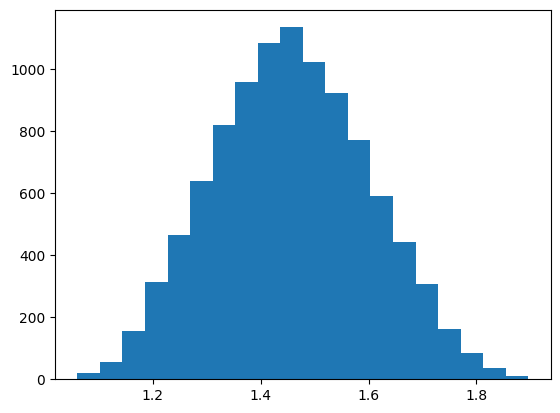

In [93]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.pyplot.hist(x_data, bins=20)

In [94]:
## Let us do box cox transform
lambda_ = 0.8
x_lambda = (np.power(x_data,lambda_) -1.0)/lambda_

(array([  16.,   50.,  131.,  275.,  410.,  599.,  763.,  902., 1050.,
        1138., 1064.,  965.,  803.,  668.,  491.,  333.,  194.,   96.,
          42.,   10.]),
 array([0.06037934, 0.09912851, 0.13787767, 0.17662684, 0.21537601,
        0.25412518, 0.29287434, 0.33162351, 0.37037268, 0.40912185,
        0.44787101, 0.48662018, 0.52536935, 0.56411852, 0.60286769,
        0.64161685, 0.68036602, 0.71911519, 0.75786436, 0.79661352,
        0.83536269]),
 <BarContainer object of 20 artists>)

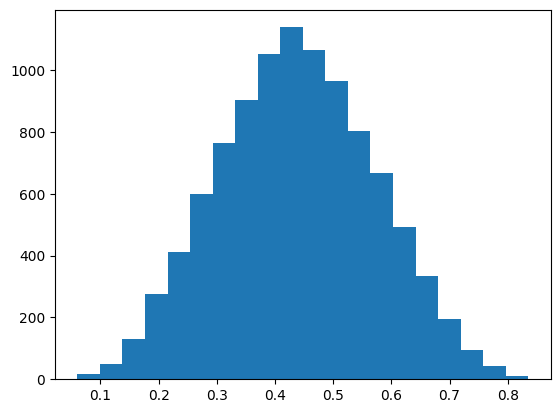

In [95]:
matplotlib.pyplot.hist(x_lambda, bins=20)

In [96]:
from scipy.stats import boxcox

# Aply box cox
box_cox_data, lam = boxcox(x_data)

In [97]:
lam

0.6166489626853755

In [98]:
box_cox_data

array([0.28886585, 0.55584525, 0.31629249, ..., 0.50031445, 0.23284594,
       0.59261822])

(array([  15.,   44.,  106.,  237.,  393.,  522.,  707.,  871., 1041.,
        1083., 1118., 1003.,  840.,  735.,  530.,  365.,  224.,  109.,
          46.,   11.]),
 array([0.06005156, 0.09626441, 0.13247726, 0.16869011, 0.20490296,
        0.24111581, 0.27732866, 0.31354151, 0.34975436, 0.38596721,
        0.42218006, 0.45839291, 0.49460576, 0.53081861, 0.56703146,
        0.60324431, 0.63945716, 0.67567001, 0.71188286, 0.74809571,
        0.78430856]),
 <BarContainer object of 20 artists>)

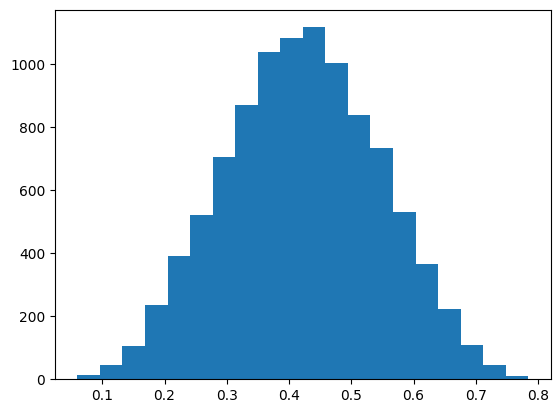

In [99]:
matplotlib.pyplot.hist(box_cox_data, bins=20)

We can see that applying the box cox transformation produced more normal looking data. Lambda = 0.40610841381072876
by the library. 

Should I try deriving it? lets see

In [100]:
def transform(data, lambda_):
    assert lambda_ != 0, "Error : an invalid lambda"
    return (np.power(data, lambda_) - 1.0)/lambda_

transform(x_data, lam)

array([0.28886585, 0.55584525, 0.31629249, ..., 0.50031445, 0.23284594,
       0.59261822])

We will do MLE of transformed data to determine $\lambda$

Note that trasformed data $x^{'}_{i} = \frac{x^{\lambda}_{i}  - 1}{\lambda}$


$ ll = n \cdot log( \frac{1}{\sqrt{2\pi}} ) - n \cdot log(\hat \sigma) - \sum_{1}^{n} \frac{(x_i^{'} - \hat \mu)^2}{2\sigma^2}$

$ll = -n/2 \cdot log( 2 \pi ) - n \cdot log(\sigma) - \sum_{1}^{n} \frac{(x_i - \mu)^2}{2\sigma^2} $

Since  $\sigma^2 = (1/n)\sum_{1}^{n} (x_i - \mu)^2$

$ll = -n/2 \cdot log( 2 \pi ) - n \cdot log(\sigma) - n/2 $


Seems minimizing varaince will do... lets check


In [101]:
def cost_fn(data):
    n       = len(data)
    mu_hat  = np.mean(data)
    var_hat = np.sum(np.power(data - mu_hat, 2.0))/n
    return var_hat
    



In [102]:
lam_values  = np.arange(start=-5, stop=5, step = 0.01)

In [103]:
costs = [cost_fn(transform(x_data, l)) for l in lam_values]

<Axes: xlabel='lam_values'>

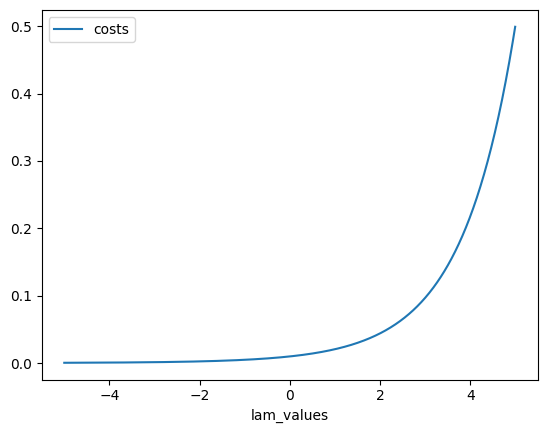

In [105]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(dict(lam_values= lam_values , costs=costs)).plot.line(x='lam_values', y='costs')

No! minimizing variance seems not working

In [2]:
import pandas as pd
# Raw data from somewhere on internet! Thanks selva86!
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv")
data  = data.rename(columns = {"value": "passengers"})
data["month"] = [str(x) for x in pd.to_datetime(data.date).dt.to_period('m')]